<h1 align="center">CHESS</h1>


<div align="center">
    <span style="color:#21946C;">Jhoan Daniela Henao García</span>
</div>


<img src="Ajedrez.png" alt="Descripción de la imagen">

## INDEX

- [Introduction](#introduction)
- [Data description](#description)
- [Data acquisition](#acquisition)
- [Data Wrangling](#wrangling)
- [EDA (Exploratory Data Analysis)](#eda)

<span style="color:#21946C;">**Introduction**</span>

Chess is known as the "science game", a game that stimulates the development of intellectual coefficient and exercises both cerebral hemispheres. Now we can practice this game online, which allows us to hold tournaments with players from different parts of the world or we can even play against an artificial intelligence which has been programmed for this type of game.
Thanks to this we have been able to collect the different games that took place in 2016 and we can analyze what has happened between the games made by artificial intelligence and by the human mind. What is the evolution shown by the AI against the human mind? Also, we want to identify, analyze the different elements or segments in the games that can increase the winning percentage.

<span style="color:#21946C;">**Data description**</span>

the data is initially in two datasets imported from Kaggle in .csv format. Both datasets have the same data description

|Campo|	Descripción|	Tipo|
|:------|:------------|:--------|
|Game|	Game name|	String|
|White|	White player|	String|
|Black|	Black player|	String|
|White Elo|	White player score|	Int|
|Black Elo|	Black player score|	Int|
|White RD|	White player score deviation|	Float|
|Black RD|	Black player score deviation|	Float|
|WhiteIsComp|	Is the White player Computer?|	Booleano|
|BlackIsComp|	Is the Black player Computer?|	Booleano|
|TimeControl|	Time that the player receives upon completing the game|	Time|
|Date|	Game date|	Date|
|Time|	Game time |	Time|
|White Clock|	Gamer's Watch White|	Time|
|Black Clock|	Gamer's Watch Black|	Time|
|ECO|	Game input|	String|
|PlayCount|	play count|	Int|
|Result|	Result in score|	Int|
|Result|	Result|	String|
|Commentaries|	Reasons to end the game|	String|
|Moves|	All game moves|	String|


<span style="color:#21946C;">**Data acquisition**</span>

Since the selected dataset belongs to Kaggle, the dedicated python module is used to interact with the Kaggle API to download the latest version of the dataset.

In [3]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import os
from collections import Counter
import matplotlib.dates as mdates
from IPython.display import Image

In [4]:
#Assigning Variables
chess_cvc = pd.read_csv(filepath_or_buffer="./Chess/2016_CvC.csv")
chess_cvh = pd.read_csv(filepath_or_buffer="./Chess/2016_CvH.csv")
barh_colors = ['white', 'black', 'gray']
barh_bgc = '#93bf85'


<span style="color:#21946C;">**Data Wrangling**</span>

Data pre-processing is performed, in this case no missing values ​​are found, so the complete data is used.

In [5]:
chess_cvc.head(3)

,Game,White,Black,White Elo,Black Elo,White RD,Black RD,WhiteIsComp,BlackIsComp,TimeControl,Date,Time,White Clock,Black Clock,ECO,PlyCount,Result,Result-Winner,Commentaries,Moves
0,"""zerowin"" vs ""GeidiPrime""",zerowin,GeidiPrime,2848,2464,0.0,0.0,Yes,Yes,900+0,2016.12.31,23:17:00,15:00.0,15:00.0,A30,72,1/2-1/2,Draw,Game drawn by mutual agreement,1. c4 c5 2. Nf3 e6 3. g3 b6 4. Bg2 Bb7 5. O-O ...
1,"""GeidiPrime"" vs ""SlowBox""",GeidiPrime,SlowBox,2455,2511,0.0,0.0,Yes,Yes,900+0,2016.12.31,20:25:00,15:00.0,15:00.0,D01,127,1-0,White,Black checkmated,1. d4 Nf6 2. Nc3 d5 3. Bg5 Nbd7 4. Nf3 h6 5. B...
2,"""zerowin"" vs ""GeidiPrime""",zerowin,GeidiPrime,2846,2457,0.0,0.0,Yes,Yes,900+0,2016.12.31,20:03:00,15:00.0,15:00.0,A40,77,1-0,White,Black resigns,1. d4 e6 2. c4 Bb4+ 3. Bd2 Bxd2+ 4. Qxd2 Nf6 5...


In [6]:
chess_cvc.isnull().sum() #It is observed that there are no missing values in any column of the dataset

Game             0
White            0
Black            0
White Elo        0
Black Elo        0
White RD         0
Black RD         0
WhiteIsComp      0
BlackIsComp      0
TimeControl      0
Date             0
Time             0
White Clock      0
Black Clock      0
ECO              0
PlyCount         0
Result           0
Result-Winner    0
Commentaries     0
Moves            0
dtype: int64

In [7]:
chess_cvh.head(3)

,Game,White,Black,White Elo,Black Elo,White RD,Black RD,WhiteIsComp,BlackIsComp,TimeControl,Date,Time,White Clock,Black Clock,ECO,PlyCount,Result,Result-Winner,Commentaries,Moves
0,"""Knightsmasher"" vs ""LuvDino""",Knightsmasher,LuvDino,2594,2041,0.0,0.0,Yes,No,120+0,2016.12.31,23:48:00,02:00.0,02:00.0,B08,93,1-0,White,Black forfeits on time,1. d4 Nf6 2. Nf3 g6 3. Nc3 Bg7 4. e4 d6 5. Be2...
1,"""Ashokag"" vs ""MortimerBlackwell""",Ashokag,MortimerBlackwell,1593,2416,0.0,0.0,No,Yes,1200+10,2016.12.31,23:21:00,20:00.0,20:00.0,B10,43,0-1,Black,White forfeits by disconnection,1. e4 c6 2. d3 d5 3. Nf3 Bg4 4. Be2 Nf6 5. h3 ...
2,"""MortimerBlackwell"" vs ""Gschach""",MortimerBlackwell,Gschach,2416,1681,0.0,0.0,Yes,No,1800+10,2016.12.31,22:55:00,30:00.0,30:00.0,C41,19,1-0,White,Black resigns,1. e4 e5 2. Nf3 d6 3. d4 Be7 4. dxe5 Bg4 5. Bb...


In [8]:
chess_cvh.isnull().sum() #It is observed that there are no missing values in any column of the dataset

Game             0
White            0
Black            0
White Elo        0
Black Elo        0
White RD         0
Black RD         0
WhiteIsComp      0
BlackIsComp      0
TimeControl      0
Date             0
Time             0
White Clock      0
Black Clock      0
ECO              0
PlyCount         0
Result           0
Result-Winner    0
Commentaries     0
Moves            0
dtype: int64

<span style="color:#21946C;">*No need to replace or filter for missing values as there are none in the datasets used*</span>

# EDA (Exploratory Data Analysis)

We can start by answering the following questions.

* What is the overall result distribution within "Computer vs Computers" and "Computer vs Human" games?
* What is progression overtime of winning of Humans against Computer?

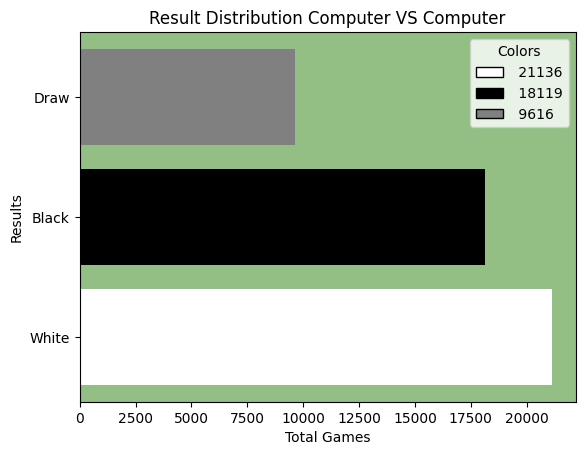

In [9]:
winners_cvc = chess_cvc['Result-Winner'].value_counts()
patches = []

plt.barh(winners_cvc.index, winners_cvc.values, color=barh_colors)
plt.xlabel('Total Games')
plt.ylabel('Results')
plt.title('Result Distribution Computer VS Computer')

# Add a legend for each bar
for i, label in enumerate(winners_cvc.index):
    patch = Patch(facecolor=barh_colors[i], edgecolor='black')
    patches.append(patch)
    plt.plot([], [], c='black', label=label)
    
# Add the legend with color boxes and values
legend = plt.legend(handles=patches,title='Colors')
for i, text in enumerate(legend.get_texts()):
    text.set_text(text.get_text() + ' {:d}'.format(winners_cvc.values[i]))

# Customize the plot
#plt.grid(True, linestyle='-', linewidth=.5, color='white')
plt.gca().set_axisbelow(True)
plt.gca().set_facecolor(barh_bgc)
plt.gca().set_zorder(10)

plt.show()

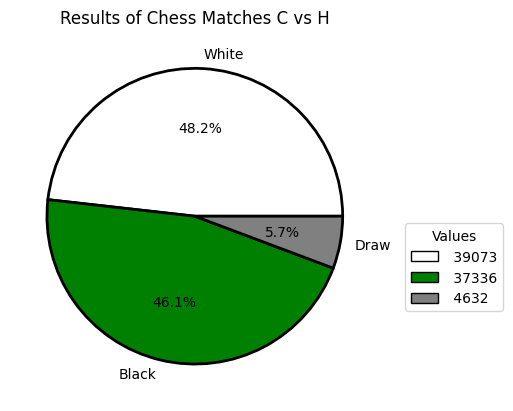

In [10]:
winners_cvh = chess_cvh['Result-Winner'].value_counts()
patches = []
pie_colors = ['white', 'green', 'gray']

# Add a title
plt.title("Results of Chess Matches C vs H")

# Add a legend for each bar
for i, label in enumerate(winners_cvh.index):
    patch = Patch(facecolor=pie_colors[i], edgecolor='black')
    patches.append(patch)
    plt.plot([], [], c='black', label=label)
    
# Add the legend with color boxes and values
legend = plt.legend(handles=patches,title='Values', bbox_to_anchor=(1.05, 0.5))
for i, text in enumerate(legend.get_texts()):
    text.set_text(text.get_text() + ' {:d}'.format(winners_cvh.values[i]))

#plt.show()
# Create a pie chart
plt.pie(winners_cvh, labels=winners_cvh.index, autopct='%1.1f%%', colors=pie_colors, wedgeprops={'linewidth': 2, 'edgecolor': 'black'})



# Show the chart
plt.show()


<span style="color:#21946C;">*In the graphs we can appreciate the distribution of all the victories according to the three possible results “Black wins”, “White wins” and “Draw”. In this way it can be confirmed that the probabilities of winning using the white pieces are greater than using the black pieces, but, nevertheless, a reduction of the ties in the database against humans can be noticed.
This could be, since a human player under time pressure is more likely to make a mistake in the last few moves.*</span>


- What is the distribution of all wins according to the three possible outcomes “Black wins”, “White wins” and “Draw”.


C:\Users\danih\AppData\Local\Temp\ipykernel_16668\3034893890.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  white_hwins['Date'] = pd.to_datetime(white_hwins['Date'])


Text(0, 0.5, 'Games')

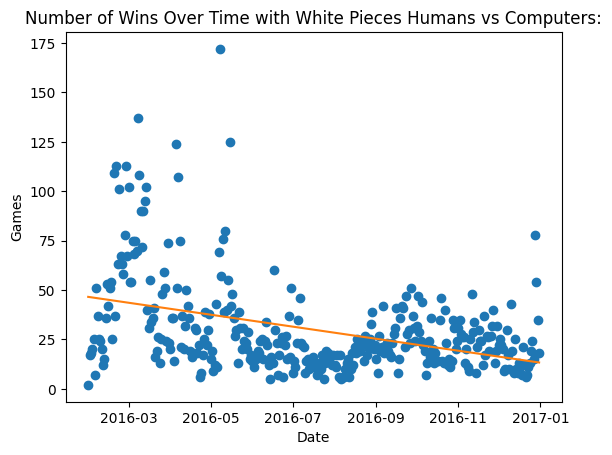

In [11]:
white_hwins = chess_cvh.loc[(chess_cvh['Result-Winner'] == 'White') & (chess_cvh['WhiteIsComp'] == 'No')]

white_hwins['Date'] = pd.to_datetime(white_hwins['Date'])
freq = white_hwins.groupby('Date')['Result-Winner'].count()

# Calculate the coefficients of a polynomial that fits the data
coefficients = np.polyfit(freq.index.astype(np.int64) // 10**9, freq.values, deg=1)

# Create a function that represents the polynomial
poly1d_fn = np.poly1d(coefficients)

plt.plot(freq.index, freq.values, 'o')
plt.plot(freq.index, poly1d_fn(freq.index.astype(np.int64) // 10**9), '-')

# Add a title and label
plt.title("Number of Wins Over Time with White Pieces Humans vs Computers:")
plt.xlabel("Date")
plt.ylabel("Games")



C:\Users\danih\AppData\Local\Temp\ipykernel_16668\1972117144.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  black_hwins['Date'] = pd.to_datetime(black_hwins['Date'])


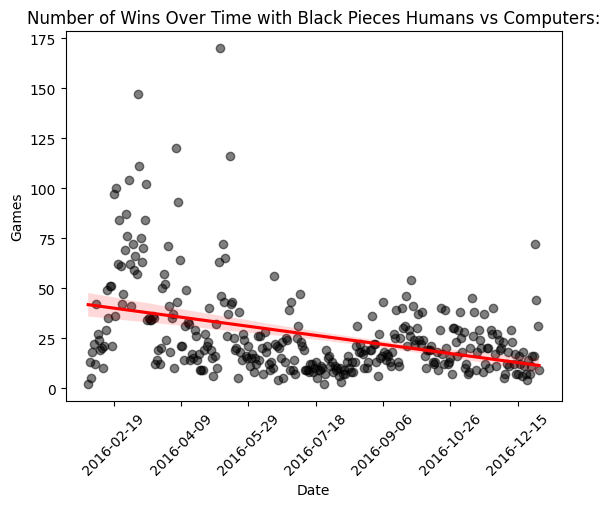

In [12]:
black_hwins = chess_cvh.loc[(chess_cvh['Result-Winner'] == 'Black') & (chess_cvh['BlackIsComp'] == 'No')]

black_hwins['Date'] = pd.to_datetime(black_hwins['Date'])
freq = black_hwins.groupby('Date')['Result-Winner'].count().reset_index()
freq.columns = ['Date', 'Frequency']

# Convert the datetime objects to numerical values
freq['Date'] = freq['Date'].apply(mdates.date2num)

# Create a scatter plot of the data with a trend line
sns.regplot(data=freq, x='Date', y='Frequency', scatter_kws={"color": "black", "alpha": 0.5}, line_kws={"color": "red"})

# Set the x-axis tick format to show dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Add a title and label
plt.title("Number of Wins Over Time with Black Pieces Humans vs Computers:")
plt.xlabel("Date")
plt.ylabel("Games")

# Display the plot
plt.show()



<span style="color:#21946C;">*In the previous graphs we can see how the trend regardless of whether using the black pieces or the white pieces is negative when we make a comparison of the games won between humans and artificial intelligence, which shows how the speed of growth of artificial intelligence begins to surpass that of the human.*</span>

- Assuming an openning is defined by the first 7 movements, what are the top 10 most winning opening using White and Black pieces Computer VS Computer?

C:\Users\danih\AppData\Local\Temp\ipykernel_16668\1097017116.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  white_wins['Moves'] = white_wins['Moves'].str.split()
C:\Users\danih\AppData\Local\Temp\ipykernel_16668\1097017116.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  white_wins['Moves'] = [[s for s in subarray if '.' not in s] for subarray in white_wins['Moves']]
C:\Users\danih\AppData\Local\Temp\ipykernel_16668\1097017116.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

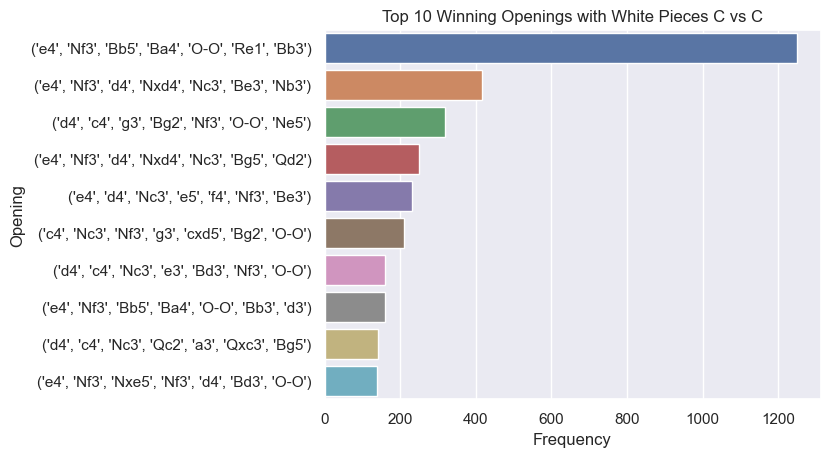

In [13]:
# Assigning Variables 
white_wins = chess_cvc.loc[chess_cvc['Result-Winner'] == 'White']
white_wins['Moves'] = white_wins['Moves'].str.split()

# remove elements containing a dot in each array
white_wins['Moves'] = [[s for s in subarray if '.' not in s] for subarray in white_wins['Moves']]

# remove black movements
white_wins['Moves'] = [[subarray[i] for i in range(len(subarray)) if i % 2 == 0] for subarray in white_wins['Moves']]

# Getting just the first 7 moves
white_wins['Moves'] = [subarray[:7] for subarray in white_wins['Moves']]

# calculate frequency of each array
frequency = Counter(tuple(subarray) for subarray in white_wins['Moves'])

# get top 10 most common arrays
top_ten = frequency.most_common(10)

# create a DataFrame from the list of tuples
top_winning_openings = pd.DataFrame(top_ten, columns=['Opening', 'Frequency'])

# sort the DataFrame by frequency in descending order
top_winning_openings = top_winning_openings.sort_values('Frequency', ascending=False)

# create a horizontal bar chart with Seaborn
sns.set(style="darkgrid")
sns.barplot(x='Frequency', y='Opening', data=top_winning_openings)
plt.title("Top 10 Winning Openings with White Pieces C vs C")
plt.xlabel("Frequency")
plt.ylabel("Opening")
plt.show()

C:\Users\danih\AppData\Local\Temp\ipykernel_16668\2590835669.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  black_wins['Moves'] = black_wins['Moves'].str.split()
C:\Users\danih\AppData\Local\Temp\ipykernel_16668\2590835669.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  black_wins['Moves'] = [[s for s in subarray if '.' not in s] for subarray in black_wins['Moves']]
C:\Users\danih\AppData\Local\Temp\ipykernel_16668\2590835669.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

Text(0.5, 1.0, 'Top 10 Winning Openings with Black Pieces C vs C')

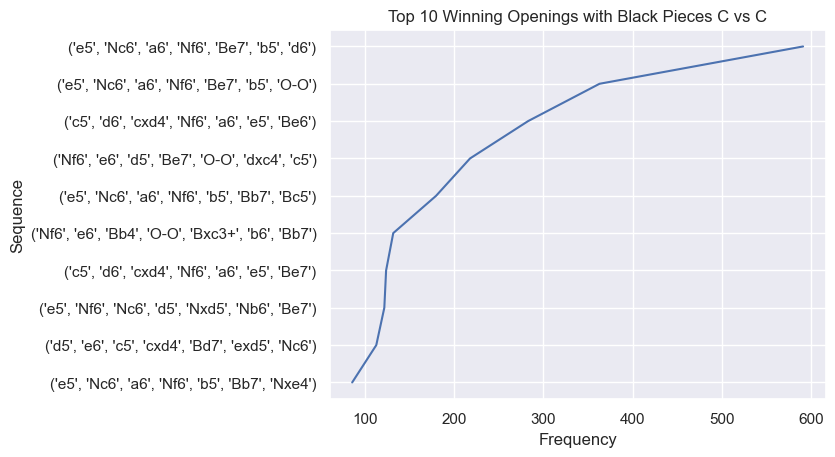

In [14]:
# Assigning Variables 
black_wins = chess_cvc.loc[chess_cvc['Result-Winner'] == 'Black']
black_wins['Moves'] = black_wins['Moves'].str.split()

# remove elements containing a dot in each array
black_wins['Moves'] = [[s for s in subarray if '.' not in s] for subarray in black_wins['Moves']]

# remove white moves
black_wins['Moves'] = [[subarray[i] for i in range(len(subarray)) if i % 2 != 0] for subarray in black_wins['Moves']]

# Getting just the first 7 moves
black_wins['Moves'] = [subarray[:7] for subarray in black_wins['Moves']]

# calculate frequency of each array
frequency = Counter(tuple(subarray) for subarray in black_wins['Moves'])

# get top 10 most common arrays
top_ten = frequency.most_common(10)

# Convert to DataFrame
df = pd.DataFrame(top_ten, columns=['Sequence', 'Frequency'])

df['Sequence'] = df['Sequence'].astype(str)

# Create line plot
sns.set_style("darkgrid")
sns.lineplot(data=df, x="Frequency", y="Sequence", sort=False)
plt.title("Top 10 Winning Openings with Black Pieces C vs C")


<span style="color:#21946C;">*In the previous graphs you can see the winning trends by opening using white pieces and black pieces. In this way we have obtained an appetizer of the most effective openings by artificial intelligences. That, although this does not define the result of the game, it plays a very important role in it.*</span>

- We are going to make a list of the AI that won the most with White, we take the 3 with the best scores and look for the number of games won with Black and how many they had in draws to observe with which chips they have the most chances of winning and/or drawing

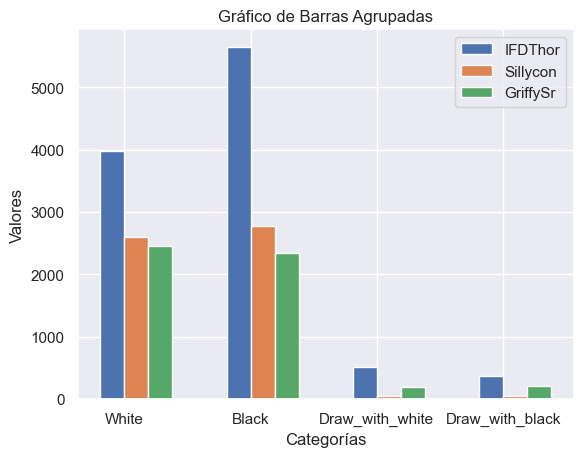

IFDThor     3986
Sillycon    2595
GriffySr    2462
Name: White, dtype: int64
IFDThor     5647
Sillycon    2769
GriffySr    2342
Name: Black, dtype: int64
IFDThor     507
GriffySr    191
Sillycon     50
Name: White, dtype: int64
IFDThor     370
GriffySr    203
Sillycon     54
Name: Black, dtype: int64


In [17]:
white_comp_wins = chess_cvh.loc[
    (chess_cvh['Result-Winner'] == 'White') & 
    (chess_cvh['WhiteIsComp'] == 'Yes')
]

black_comp_wins = chess_cvh.loc[
    (chess_cvh['Black'] == 'IFDThor') | 
    (chess_cvh['Black'] == 'Sillycon') | 
    (chess_cvh['Black'] == 'GriffySr') & 
    (chess_cvh['Result-Winner'] == 'Black')
]


draw_white_top_3 = chess_cvh.loc[
    (chess_cvh['White'] == 'IFDThor')  & (chess_cvh['Result-Winner'] == 'Draw') |
    (chess_cvh['White'] == 'Sillycon')  & (chess_cvh['Result-Winner'] == 'Draw') |
    (chess_cvh['White'] == 'GriffySr')  & (chess_cvh['Result-Winner'] == 'Draw')  
]

draw_black_top_3 = chess_cvh.loc[
    (chess_cvh['Black'] == 'IFDThor') & (chess_cvh['Result-Winner'] == 'Draw')| 
    (chess_cvh['Black'] == 'Sillycon')  & (chess_cvh['Result-Winner'] == 'Draw') |
    (chess_cvh['Black'] == 'GriffySr')  & (chess_cvh['Result-Winner'] == 'Draw') 
]

# Get the repeat count of the desired column
agrupation_white = white_comp_wins['White'].value_counts()
agrupation_black = black_comp_wins['Black'].value_counts()
agrupation_draw_white = draw_white_top_3['White'].value_counts()
agrupation_draw_black = draw_black_top_3['Black'].value_counts()

# get top 10
top3_white_wins = agrupation_white.head(3)
top3_black_wins = agrupation_black.head(3)
top3_white_draw = agrupation_draw_white.head(3)
top3_black_draw = agrupation_draw_black.head(3)

result_category = ["White", "Black", "Draw_with_white", "Draw_with_black"]

top_1 = [top3_white_wins[0], top3_black_wins[0], top3_white_draw[0], top3_black_draw[0]]
top_2 = [top3_white_wins[1], top3_black_wins[1], top3_white_draw[2], top3_black_draw[2]]
top_3 = [top3_white_wins[2], top3_black_wins[2], top3_white_draw[1], top3_black_draw[1]]

# Set the width of the bars
ancho_barras = 0.19

# Create the position indices of the bars
indices = np.arange(len(result_category))

# Create the figure and axes
fig, ax = plt.subplots()

# Create the bars for each set of values
rects1 = ax.bar(indices, top_1, ancho_barras, label='IFDThor')
rects2 = ax.bar(indices + ancho_barras, top_2, ancho_barras, label='Sillycon')
rects3 = ax.bar(indices + ancho_barras*2, top_3, ancho_barras, label='GriffySr')

# Set the title of the graph
ax.set_title('Top 3 AIs')

# Add labels to the bars
ax.set_xlabel('Categorías')
ax.set_ylabel('Valores')
ax.set_title('Gráfico de Barras Agrupadas')
ax.set_xticks(indices + ancho_barras / 2)
ax.set_xticklabels(result_category)

# add legend
ax.legend()

# show the graph
plt.show()

print(top3_white_wins)
print(top3_black_wins)
print(top3_white_draw)
print(top3_black_draw)


<span style="color:#21946C;">*We can see that with Black 2 of the AIs they had more games won and less drawn than with White*</span>


**Previous conclusions:**

Analyzing the data of a single year, you can witness the growth of artificial intelligence in the field of chess. Being these results, an appetizer to be able to deepen in a more specific way and thus be able to provide more tools to a player who wishes to improve his game. Additionally, it was possible to mathematically confirm statements such as white always has an advantage, and find an initial pattern to understand the game of artificial intelligence.